In [1]:
import torch
from torchvision.models import vgg16
from datasets import PascalVOC2012
from dummy_model import Dummy
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch.autograd import Variable
from PIL import Image
import torchvision.transforms.functional as F

In [2]:
from fcn_model import FCNModel
import numpy as np
import matplotlib.pyplot as plt

In [3]:
model = FCNModel()

In [4]:
model.from_file('/project/fcn_b9.pt')
model.eval()

FCNModel(
  (padding): ZeroPad2d(padding=(100, 100, 100, 100), value=0)
  (vgg_pool1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vgg_pool2): Sequential(
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vgg_pool3): Sequential(
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1,

In [5]:
dataset = PascalVOC2012('val')
result = model(dataset[1]['image'].unsqueeze(0))

AttributeError: 'Image' object has no attribute 'unsqueeze'

In [6]:
_in = dataset[9]['image']
_

AttributeError: 'Image' object has no attribute 'shape'

In [8]:
from scipy.misc import imresize

In [13]:
_in = dataset[9]['image']
_in = np.array(_in)
# _in_pad = np.zeros((512, 512, 3))
# _in_pad[:_in.shape[0], :_in.shape[1], :] = _in
_in = imresize(_in, (512, 512, 3))
# _in = np.transpose(_in, (2, 0, 1))
# plt.imshow(_in)
_in.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


(512, 512, 3)

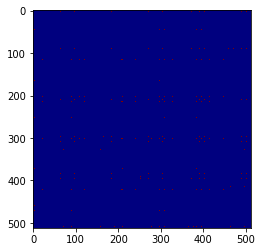

In [13]:
out = result.detach().numpy()[0].argmax(axis=0)* (255/20)
out = out.astype('uint8')
# Image.fromarray(out)
plt.imshow(out, cmap='jet')